<a href="https://colab.research.google.com/github/Madhavgiga1/SoftwareCostPrediction-Using-Machine-Learning/blob/main/DesharnisML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install liac-arff


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=094197608103a927b35ca6c9e996c20e0f9bb83a784c395bea56d538a1050bae
  Stored in directory: /root/.cache/pip/wheels/08/82/8b/5c514221984e88c059b94e36a71d4722e590acaae04deab22e
Successfully built liac-arff


In [2]:
import arff, numpy as np
import pandas as pd
from scipy.io.arff import loadarff
import urllib.request
from io import StringIO, BytesIO
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [3]:
df_desharnais = pd.read_csv('02.desharnais.csv',  header=0)
df_desharnais.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [4]:
features = [ 'TeamExp', 'ManagerExp', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[features]
Y = df_desharnais['Effort']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)

In [6]:
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(1,9):   
    clf= RandomForestRegressor(n_estimators=500,max_features=i)
    clf.fit(X_train, y_train)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [7]:
MMRE_list

[0.8744470758691496,
 0.8215611629082262,
 0.8215635983703988,
 0.8309304575466886,
 0.8159204284003821,
 0.8198277029830884,
 0.7980499491137282,
 0.8284517261875003]

In [8]:
MdMRE_list

[0.3536301942463732,
 0.33003861003860996,
 0.3203772691397,
 0.30177426992896605,
 0.3761389108129439,
 0.3918216258879243,
 0.34317284925019725,
 0.39053670086819253]

In [9]:
Pred_list


[40.0, 36.0, 36.0, 32.0, 32.0, 32.0, 28.000000000000004, 36.0]

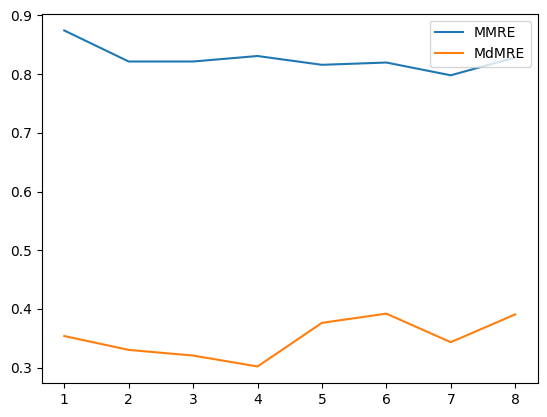

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,9)

plt.plot(x, MMRE_list)
plt.plot(x, MdMRE_list)

plt.legend(['MMRE','MdMRE'], loc='upper right')

plt.show()

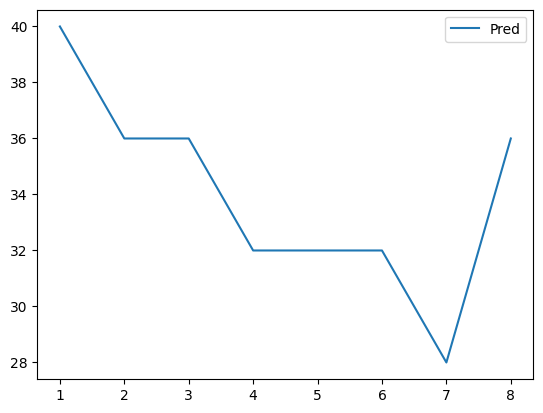

In [11]:
plt.plot(x, Pred_list)
plt.legend(['Pred'], loc='upper right')
plt.show()

**Desharnis n_estimator=100 to 1000 and mf=5**

In [12]:
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(100,1100,100):   
    clf= RandomForestRegressor(n_estimators=i,max_features=5)
    clf.fit(X_train, y_train)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [13]:
MMRE_list

[0.8067696505583517,
 0.7961010906891838,
 0.8097531429832078,
 0.8346594041606445,
 0.8189631043449943,
 0.8099443710707793,
 0.8309615183415265,
 0.8200409662368306,
 0.8203956025382348,
 0.8153204680104928]

In [14]:
MdMRE_list


[0.38730860299921077,
 0.3233851884312007,
 0.36844251512759796,
 0.2979591836734694,
 0.34232202052091554,
 0.3354380426203631,
 0.34813507723531406,
 0.3310112470402525,
 0.3266692975532755,
 0.37911128650355175]

In [15]:
Pred_list

[32.0,
 24.0,
 28.000000000000004,
 28.000000000000004,
 36.0,
 32.0,
 28.000000000000004,
 32.0,
 28.000000000000004,
 28.000000000000004]

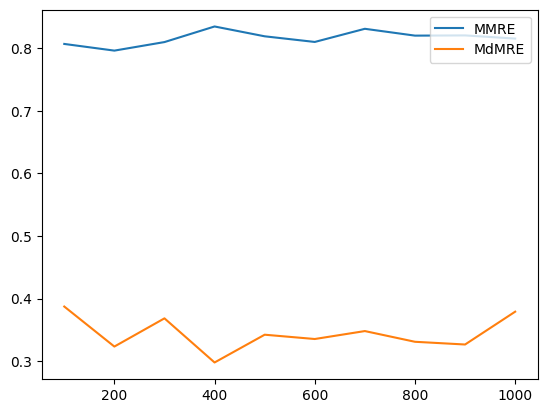

In [16]:
x = np.arange(100,1100,100)
plt.plot(x, MMRE_list)
plt.plot(x, MdMRE_list)

plt.legend(['MMRE','MdMRE'], loc='upper right')

plt.show()

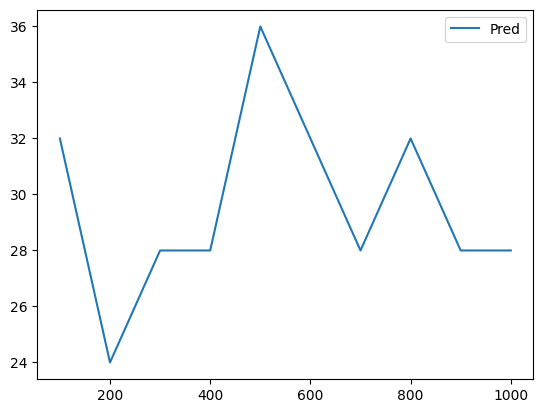

In [17]:
plt.plot(x, Pred_list)
plt.legend(['Pred'], loc='upper right')
plt.show()

In [18]:
params_grd={
 'max_features': [1,2,3,4,5,6,7,8],
  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [19]:
clf= RandomForestRegressor()
grd_search=GridSearchCV(estimator = clf, param_grid = params_grd, 
                          cv = 10, n_jobs = -1, verbose = 2)
grd_search.fit(X_train, y_train)
best_grid = grd_search.best_estimator_

Y_pred=best_grid.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100

Fitting 10 folds for each of 80 candidates, totalling 800 fits


In [22]:
print(MMRE)
print(MdMRE)
print(Pred)

0.882615081201815
0.36619691119691117
40.0


In [21]:
grd_search.best_params_


{'max_features': 1, 'n_estimators': 200}

**RANDOM HYPEPARAMETER GRID**

In [23]:
Random_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': [1,2,3,4,5,6,7,8],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [24]:
clf= RandomForestRegressor()
random_grd_search=RandomizedSearchCV(estimator = clf, param_distributions = Random_grid, n_iter = 100, cv = 10, 
                              verbose=2, random_state=42, n_jobs = -1)
random_grd_search.fit(X_train, y_train)
best_grid = random_grd_search.best_estimator_

Y_pred=best_grid.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [25]:
print(MMRE)
print(MdMRE)
print(Pred)

0.8978225416069863
0.3082641935831176
40.0


In [ ]:
random_grd_search.best_params_

**Decision Tree Regresssion**

In [26]:
clf= DecisionTreeRegressor(max_depth=30, min_samples_split=20)
clf.fit(X_train, y_train)
Y_pred=clf.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100

In [27]:
print(MMRE)
print(MdMRE)
print(Pred)

0.877470068699311
0.5049426020408163
36.0
